In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import StandardScaler
le = preprocessing.LabelEncoder() 

In [8]:
data=pd.read_table('/content/drive/MyDrive/fruit_data_with_colors.txt')
data.shape

(59, 7)

In [9]:
data.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [10]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
lookupfruit=dict(zip(data.fruit_label.unique(), data.fruit_name.unique())) 
lookupfruit

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [12]:
X=data[['mass', 'width', 'height']]
y=data['fruit_label']

In [13]:
print(X.shape)
print(y.shape)

(59, 3)
(59,)


In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape

(44, 3)

In [15]:
y_train.shape

(44,)

In [16]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_predict=knn.predict(X_test)
y_correct=np.array(y_test)
print(np.concatenate((y_predict.reshape(len(y_predict), 1), y_correct.reshape(len(y_correct),1)),axis=1))

[[3 3]
 [1 3]
 [4 4]
 [4 3]
 [1 1]
 [1 1]
 [3 3]
 [3 4]
 [1 3]
 [4 1]
 [2 2]
 [1 1]
 [3 3]
 [1 3]
 [4 3]]


In [18]:
knn.score(X_test, y_test)

0.5333333333333333

In [19]:
knn.score(X_train, y_train)

0.7954545454545454

In [20]:
conf_mat=confusion_matrix(y_test, y_predict)
print(conf_mat)

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]


In [21]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6

In [22]:
fruit1_new = np.array([[100, 6.3, 8.5]])

In [23]:
prediction1 = knn.predict(fruit1_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [24]:
lookupfruit[prediction1[0]]

'mandarin'

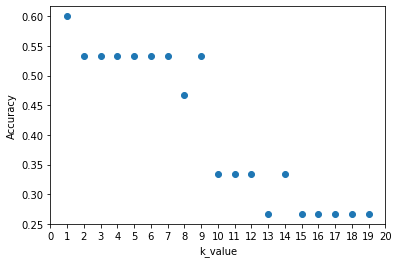

In [25]:
k_range = range(1,20)
scores = []
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors = k)
 knn.fit(X_train, y_train)
 scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,21));

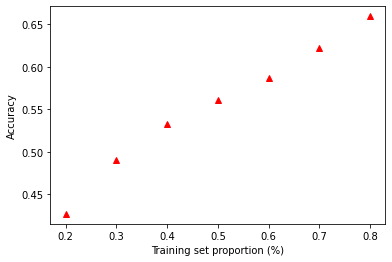

In [26]:
t = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
knn = KNeighborsClassifier(n_neighbors = 3)
plt.figure()
for split in t:
  scores = []
  for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
  plt.plot(split, np.mean(scores), 'r^')
plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy');

# Train and Test

In [38]:
train_data=pd.read_csv("/content/drive/MyDrive/train_data.csv")
train_data

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6995,6996,45,2.0,Aadhar,930948,1258344,0,0,0,1
6996,6997,41,2.0,Aadhar,681108,791040,4,4,0,1
6997,6998,47,2.0,Aadhar,627636,720336,35,11,0,1
6998,6999,39,1.0,Aadhar,654708,793860,0,0,0,1


In [39]:
le=LabelEncoder()

In [40]:
train_data['proof_submitted']=le.fit_transform(train_data['proof_submitted'])
train_data.drop("loan_id",axis=1,inplace=True)
train_data.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,0,504264,820920,2,2,0,0
1,48,1.0,0,728556,831444,6,2,0,0
2,30,2.0,4,642936,826092,0,0,0,1
3,28,1.0,0,746556,930924,0,0,0,0
4,29,1.0,0,1139880,1902000,0,0,0,0


In [41]:
train_data.no_of_curr_loans.unique()

array([ 2,  0,  3,  4,  8,  6,  7,  5,  9, 11, 27, 10, 16, 17, 13, 14, 33,
       20, 18, 12, 15])

In [42]:
train_data.no_of_loans.unique()

array([  2,   6,   0,   3,   7,   5,   4,  13,  10,   9,  12,  16,   8,
        11,  26,  14,  20,  36,  19,  64,  55,  17,  28,  44,  15,  29,
        18,  31,  23,  22,  25,  48, 109,  34,  54,  39,  21,  24,  52,
        30,  32,  35,  57,  38,  37,  40,  33,  50,  46,  58,  27,  41,
        77,  79,  70,  43,  45])

In [43]:
train_data.education.unique()

array([ 1.,  2., nan])

In [44]:
train_data.last_delinq_none.unique()

array([0, 1])

In [45]:
sum(train_data.education.isnull())

245

In [46]:
train_data['education'].fillna(0,inplace=True)

In [47]:
sum(train_data.education.isnull())

0

In [48]:
train_data.loan_default.unique()

array([0, 1])

In [49]:
X_train=train_data.drop("loan_default",axis=1)
y_train=train_data['loan_default']

In [51]:
sc=StandardScaler()
X_train[['age','loan_amount','asset_cost']]=sc.fit_transform(X_train[['age','loan_amount','asset_cost']])

In [52]:
X_train.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,-1.198943,1.0,0,-1.062009,-0.444709,2,2,0
1,1.568892,1.0,0,0.435246,-0.395640,6,2,0
2,-0.803538,2.0,4,-0.136308,-0.420594,0,0,0
3,-1.067142,1.0,0,0.555405,0.068186,0,0,0
4,-0.935340,1.0,0,3.181030,4.595834,0,0,0


In [53]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.score(X_train,y_train)

0.9998571428571429

In [56]:
test_data=pd.read_csv('/content/drive/MyDrive/test_data.csv')
test_data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [59]:
test_data.drop('loan_id',axis=1,inplace=True)
test_data['proof_submitted']=le.fit_transform(test_data['proof_submitted'])
X_test=test_data
X_test[['age','loan_amount','asset_cost']]=sc.transform(X_test[['age','loan_amount','asset_cost']])

In [60]:
X_test.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,-0.935340,1.0,0,-0.176361,-0.690330,2,2,0
1,-1.067142,1.0,0,-0.763455,-1.040857,3,3,0
2,-1.067142,1.0,0,-0.077430,0.094650,0,0,0
3,1.173487,2.0,0,-0.324957,-0.799432,4,3,0
4,1.568892,1.0,0,-0.254464,-0.358546,0,0,0


In [61]:
X_test.education.fillna(0,inplace=True)
for i in X_test.columns:
    print(sum(X_test[i].isnull()))

0
0
0
0
0
0
0
0


In [62]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])